In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('laptop_price.csv', encoding='Latin-1')

In [3]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [5]:
df.Company.value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

In [6]:
df.Product.value_counts()

Product
XPS 13                                     30
Inspiron 3567                              29
250 G6                                     21
Legion Y520-15IKBN                         19
Vostro 3568                                19
                                           ..
15-bw007nv (A10-9620P/6GB/128GB/Radeon      1
SmartBook 130                               1
A541NA-GO342 (N3350/4GB/500GB/Linux)        1
17-X047na (i3-6006U/8GB/1TB/W10)            1
V330-15IKB (i5-8250U/4GB/500GB/FHD/W10)     1
Name: count, Length: 618, dtype: int64

In [7]:
df.TypeName.value_counts()

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64

In [8]:
df.OpSys.value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [9]:
df = df.drop('Product', axis=1)

In [10]:
df = df.join(pd.get_dummies(df.Company, dtype='int'))
df = df.drop('Company', axis=1)

In [11]:
df = df.join(pd.get_dummies(df.TypeName, dtype='int'))
df = df.drop('TypeName', axis=1)

In [12]:
df = df.join(pd.get_dummies(df['OpSys'], dtype="int"))
df = df.drop("OpSys", axis=1)

In [13]:
df

,laptop_ID,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,Weight,Price_euros,Acer,...,Workstation,Android,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS
0,1,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,1.37kg,1339.69,0,...,0,0,0,0,0,0,0,0,0,1
1,2,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,1.34kg,898.94,0,...,0,0,0,0,0,0,0,0,0,1
2,3,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,1.86kg,575.00,0,...,0,0,0,0,0,1,0,0,0,0
3,4,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,1.83kg,2537.45,0,...,0,0,0,0,0,0,0,0,0,1
4,5,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,1.37kg,1803.60,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,1.8kg,638.00,0,...,0,0,0,0,0,0,1,0,0,0
1299,1317,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,1.3kg,1499.00,0,...,0,0,0,0,0,0,1,0,0,0
1300,1318,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,1.5kg,229.00,0,...,0,0,0,0,0,0,1,0,0,0
1301,1319,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,2.19kg,764.00,0,...,0,0,0,0,0,0,1,0,0,0


In [14]:
df['ScreenResolution'] = df.ScreenResolution.str.split().apply(lambda x: x[-1])
df['Screen Width'] = df.ScreenResolution.str.split("x").apply(lambda x: x[0])
df['Screen Height'] = df.ScreenResolution.str.split("x").apply(lambda x: x[1])
df = df.drop("ScreenResolution", axis=1)

In [15]:
df["CPU Brand"] = df.Cpu.str.split().apply(lambda x: x[0])
df["CPU Frequency"] = df.Cpu.str.split().apply(lambda x: x[-1])
df = df.drop("Cpu", axis=1)

In [16]:
df["CPU Brand"].value_counts()

CPU Brand
Intel      1240
AMD          62
Samsung       1
Name: count, dtype: int64

In [17]:
df = df[df["CPU Brand"] != 'Samsung']

In [18]:
df["CPU Brand"] = df["CPU Brand"].apply(lambda x: 1 if x == 'intel' else 0)

In [19]:
df["CPU Frequency"] = df["CPU Frequency"].str[:-3]

In [20]:
df

,laptop_ID,Inches,Ram,Memory,Gpu,Weight,Price_euros,Acer,Apple,Asus,...,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS,Screen Width,Screen Height,CPU Brand,CPU Frequency
0,1,13.3,8GB,128GB SSD,Intel Iris Plus Graphics 640,1.37kg,1339.69,0,1,0,...,0,0,0,0,0,1,2560,1600,0,2.3
1,2,13.3,8GB,128GB Flash Storage,Intel HD Graphics 6000,1.34kg,898.94,0,1,0,...,0,0,0,0,0,1,1440,900,0,1.8
2,3,15.6,8GB,256GB SSD,Intel HD Graphics 620,1.86kg,575.00,0,0,0,...,0,1,0,0,0,0,1920,1080,0,2.5
3,4,15.4,16GB,512GB SSD,AMD Radeon Pro 455,1.83kg,2537.45,0,1,0,...,0,0,0,0,0,1,2880,1800,0,2.7
4,5,13.3,8GB,256GB SSD,Intel Iris Plus Graphics 650,1.37kg,1803.60,0,1,0,...,0,0,0,0,0,1,2560,1600,0,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,14.0,4GB,128GB SSD,Intel HD Graphics 520,1.8kg,638.00,0,0,0,...,0,0,1,0,0,0,1920,1080,0,2.5
1299,1317,13.3,16GB,512GB SSD,Intel HD Graphics 520,1.3kg,1499.00,0,0,0,...,0,0,1,0,0,0,3200,1800,0,2.5
1300,1318,14.0,2GB,64GB Flash Storage,Intel HD Graphics,1.5kg,229.00,0,0,0,...,0,0,1,0,0,0,1366,768,0,1.6
1301,1319,15.6,6GB,1TB HDD,AMD Radeon R5 M330,2.19kg,764.00,0,0,0,...,0,0,1,0,0,0,1366,768,0,2.5


In [21]:
df["Ram"] = df["Ram"].str[:-2]

In [22]:
df["Memory Amount"] = df.Memory.str.split().apply(lambda x: x[0])
df["Memory Type"] = df.Memory.str.split().apply(lambda x: x[-1])
df = df.drop("Memory", axis=1)

In [23]:
def turn_memory_into_MB(value):
    if 'GB' in value:
        return float(value[:value.find("GB")]) * 1000
    elif "TB" in value:
        return float(value[:value.find("TB")]) * 1000000

In [24]:
df["Memory Amount"] = df["Memory Amount"].apply(turn_memory_into_MB)

In [25]:
df = df.join(pd.get_dummies(df["Memory Type"], dtype='int'))
df = df.drop("Memory Type", axis=1)

In [26]:
df

,laptop_ID,Inches,Ram,Gpu,Weight,Price_euros,Acer,Apple,Asus,Chuwi,...,macOS,Screen Width,Screen Height,CPU Brand,CPU Frequency,Memory Amount,HDD,Hybrid,SSD,Storage
0,1,13.3,8,Intel Iris Plus Graphics 640,1.37kg,1339.69,0,1,0,0,...,1,2560,1600,0,2.3,128000.0,0,0,1,0
1,2,13.3,8,Intel HD Graphics 6000,1.34kg,898.94,0,1,0,0,...,1,1440,900,0,1.8,128000.0,0,0,0,1
2,3,15.6,8,Intel HD Graphics 620,1.86kg,575.00,0,0,0,0,...,0,1920,1080,0,2.5,256000.0,0,0,1,0
3,4,15.4,16,AMD Radeon Pro 455,1.83kg,2537.45,0,1,0,0,...,1,2880,1800,0,2.7,512000.0,0,0,1,0
4,5,13.3,8,Intel Iris Plus Graphics 650,1.37kg,1803.60,0,1,0,0,...,1,2560,1600,0,3.1,256000.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,14.0,4,Intel HD Graphics 520,1.8kg,638.00,0,0,0,0,...,0,1920,1080,0,2.5,128000.0,0,0,1,0
1299,1317,13.3,16,Intel HD Graphics 520,1.3kg,1499.00,0,0,0,0,...,0,3200,1800,0,2.5,512000.0,0,0,1,0
1300,1318,14.0,2,Intel HD Graphics,1.5kg,229.00,0,0,0,0,...,0,1366,768,0,1.6,64000.0,0,0,0,1
1301,1319,15.6,6,AMD Radeon R5 M330,2.19kg,764.00,0,0,0,0,...,0,1366,768,0,2.5,1000000.0,1,0,0,0


In [27]:
df["GPU Brand"] = df.Gpu.str.split().apply(lambda x: x[0])
df = df.drop("Gpu", axis=1)

In [28]:
gpu_categories = pd.get_dummies(df["GPU Brand"], dtype="int")
gpu_categories.columns =[col +"_GPU" for col in gpu_categories.columns]

df = df.join(gpu_categories)
df = df.drop("GPU Brand", axis=1)

In [29]:
df["Weight"] = df["Weight"].str[:-2]

In [30]:
df

,laptop_ID,Inches,Ram,Weight,Price_euros,Acer,Apple,Asus,Chuwi,Dell,...,CPU Brand,CPU Frequency,Memory Amount,HDD,Hybrid,SSD,Storage,AMD_GPU,Intel_GPU,Nvidia_GPU
0,1,13.3,8,1.37,1339.69,0,1,0,0,0,...,0,2.3,128000.0,0,0,1,0,0,1,0
1,2,13.3,8,1.34,898.94,0,1,0,0,0,...,0,1.8,128000.0,0,0,0,1,0,1,0
2,3,15.6,8,1.86,575.00,0,0,0,0,0,...,0,2.5,256000.0,0,0,1,0,0,1,0
3,4,15.4,16,1.83,2537.45,0,1,0,0,0,...,0,2.7,512000.0,0,0,1,0,1,0,0
4,5,13.3,8,1.37,1803.60,0,1,0,0,0,...,0,3.1,256000.0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,14.0,4,1.8,638.00,0,0,0,0,0,...,0,2.5,128000.0,0,0,1,0,0,1,0
1299,1317,13.3,16,1.3,1499.00,0,0,0,0,0,...,0,2.5,512000.0,0,0,1,0,0,1,0
1300,1318,14.0,2,1.5,229.00,0,0,0,0,0,...,0,1.6,64000.0,0,0,0,1,0,1,0
1301,1319,15.6,6,2.19,764.00,0,0,0,0,0,...,0,2.5,1000000.0,1,0,0,0,1,0,0


In [31]:
df["Screen Width"] = df["Screen Width"].astype("int")
df["Screen Height"] = df["Screen Height"].astype("int")

In [32]:
df["CPU Frequency"] = df["CPU Frequency"].astype("float")

In [33]:
df["Ram"] = df["Ram"].astype("int")

In [34]:
df["Memory Amount"] = df["Memory Amount"].astype('int')

In [35]:
df["Weight"] = df["Weight"].astype("float")

In [36]:
df

,laptop_ID,Inches,Ram,Weight,Price_euros,Acer,Apple,Asus,Chuwi,Dell,...,CPU Brand,CPU Frequency,Memory Amount,HDD,Hybrid,SSD,Storage,AMD_GPU,Intel_GPU,Nvidia_GPU
0,1,13.3,8,1.37,1339.69,0,1,0,0,0,...,0,2.3,128000,0,0,1,0,0,1,0
1,2,13.3,8,1.34,898.94,0,1,0,0,0,...,0,1.8,128000,0,0,0,1,0,1,0
2,3,15.6,8,1.86,575.00,0,0,0,0,0,...,0,2.5,256000,0,0,1,0,0,1,0
3,4,15.4,16,1.83,2537.45,0,1,0,0,0,...,0,2.7,512000,0,0,1,0,1,0,0
4,5,13.3,8,1.37,1803.60,0,1,0,0,0,...,0,3.1,256000,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,14.0,4,1.80,638.00,0,0,0,0,0,...,0,2.5,128000,0,0,1,0,0,1,0
1299,1317,13.3,16,1.30,1499.00,0,0,0,0,0,...,0,2.5,512000,0,0,1,0,0,1,0
1300,1318,14.0,2,1.50,229.00,0,0,0,0,0,...,0,1.6,64000,0,0,0,1,0,1,0
1301,1319,15.6,6,2.19,764.00,0,0,0,0,0,...,0,2.5,1000000,1,0,0,0,1,0,0


In [37]:
df.columns

Index(['laptop_ID', 'Inches', 'Ram', 'Weight', 'Price_euros', 'Acer', 'Apple',
       'Asus', 'Chuwi', 'Dell', 'Fujitsu', 'Google', 'HP', 'Huawei', 'LG',
       'Lenovo', 'MSI', 'Mediacom', 'Microsoft', 'Razer', 'Samsung', 'Toshiba',
       'Vero', 'Xiaomi', '2 in 1 Convertible', 'Gaming', 'Netbook', 'Notebook',
       'Ultrabook', 'Workstation', 'Android', 'Chrome OS', 'Linux', 'Mac OS X',
       'No OS', 'Windows 10', 'Windows 10 S', 'Windows 7', 'macOS',
       'Screen Width', 'Screen Height', 'CPU Brand', 'CPU Frequency',
       'Memory Amount', 'HDD', 'Hybrid', 'SSD', 'Storage', 'AMD_GPU',
       'Intel_GPU', 'Nvidia_GPU'],
      dtype='object')

In [38]:
df.corr()

,laptop_ID,Inches,Ram,Weight,Price_euros,Acer,Apple,Asus,Chuwi,Dell,...,CPU Brand,CPU Frequency,Memory Amount,HDD,Hybrid,SSD,Storage,AMD_GPU,Intel_GPU,Nvidia_GPU
laptop_ID,1.000000,-0.085876,-0.027683,-0.010335,0.068632,-0.057444,-0.119540,-0.043878,-0.043329,-0.013038,...,NaN,0.103466,0.000468,0.037622,0.109063,-0.070393,0.026450,-0.088683,0.095834,-0.036895
Inches,-0.085876,1.000000,0.237129,0.827397,0.067329,0.009019,-0.159261,0.112385,-0.017521,0.044560,...,NaN,0.307476,0.268335,0.539269,0.049481,-0.375634,-0.368493,0.206738,-0.595010,0.486348
Ram,-0.027683,0.237129,1.000000,0.383362,0.742905,-0.138670,0.023873,0.088418,-0.035159,0.081914,...,NaN,0.367764,0.017522,-0.010369,0.033795,0.092135,-0.191878,-0.093417,-0.320534,0.415213
Weight,-0.010335,0.827397,0.383362,1.000000,0.209867,0.056183,-0.138419,0.101026,-0.022601,0.087977,...,NaN,0.320090,0.178992,0.521475,0.090125,-0.415839,-0.259586,0.106187,-0.598217,0.565032
Price_euros,0.068632,0.067329,0.742905,0.209867,1.000000,-0.208541,0.080636,-0.010568,-0.055680,0.048245,...,NaN,0.430122,-0.123038,-0.170436,0.007003,0.267201,-0.215617,-0.199666,-0.184894,0.348576
Acer,-0.057444,0.009019,-0.138670,0.056183,-0.208541,1.000000,-0.037527,-0.108924,-0.014085,-0.159332,...,NaN,-0.105090,0.027926,0.042587,-0.028269,-0.078029,0.089369,-0.034952,0.005057,0.020702
Apple,-0.119540,-0.159261,0.023873,-0.138419,0.080636,-0.037527,1.000000,-0.047583,-0.006153,-0.069603,...,NaN,-0.078026,-0.043111,-0.114045,-0.012349,0.008065,0.233822,0.001709,0.077956,-0.085263
Asus,-0.043878,0.112385,0.088418,0.101026,-0.010568,-0.108924,-0.047583,1.000000,-0.017860,-0.202028,...,NaN,-0.022776,-0.015743,0.128346,-0.035844,-0.144844,0.052566,-0.073892,-0.107029,0.170590
Chuwi,-0.043329,-0.017521,-0.035159,-0.022601,-0.055680,-0.014085,-0.006153,-0.017860,1.000000,-0.026125,...,NaN,-0.092297,-0.051146,-0.042805,-0.004635,-0.047324,0.197183,-0.019248,0.043073,-0.032002
Dell,-0.013038,0.044560,0.081914,0.087977,0.048245,-0.159332,-0.069603,-0.202028,-0.026125,1.000000,...,NaN,-0.020620,0.057606,0.061206,-0.014123,-0.000801,-0.124533,0.190588,-0.076217,-0.060481


In [39]:
target_correlations = df.corr()['Price_euros'].apply(abs).sort_values()

In [40]:
target_correlations

Xiaomi                0.000748
Hybrid                0.007003
Asus                  0.010568
Mac OS X              0.015619
Huawei                0.016834
Windows 10 S          0.018275
Fujitsu               0.027164
Lenovo                0.029293
Google                0.038068
Android               0.038727
Toshiba               0.040246
HP                    0.041566
Samsung               0.043169
Microsoft             0.047536
Dell                  0.048245
Chuwi                 0.055680
LG                    0.067040
Inches                0.067329
laptop_ID             0.068632
Vero                  0.072013
2 in 1 Convertible    0.074564
Apple                 0.080636
Mediacom              0.087213
macOS                 0.089893
Netbook               0.097660
Chrome OS             0.117342
Memory Amount         0.123038
Windows 10            0.136213
Windows 7             0.152312
Linux                 0.162204
HDD                   0.170436
No OS                 0.177246
MSI     

In [41]:
selected_features = target_correlations[-21:].index

In [42]:
selected_features = target_correlations[-21:].index

In [43]:
selected_features

Index(['HDD', 'No OS', 'MSI', 'Intel_GPU', 'AMD_GPU', 'Acer', 'Weight',
       'Storage', 'Razer', 'Workstation', 'Ultrabook', 'SSD', 'Nvidia_GPU',
       'Gaming', 'CPU Frequency', 'Notebook', 'Screen Height', 'Screen Width',
       'Ram', 'Price_euros', 'CPU Brand'],
      dtype='object')

In [44]:
limited_df = df[selected_features]

In [45]:
limited_df

,HDD,No OS,MSI,Intel_GPU,AMD_GPU,Acer,Weight,Storage,Razer,Workstation,...,SSD,Nvidia_GPU,Gaming,CPU Frequency,Notebook,Screen Height,Screen Width,Ram,Price_euros,CPU Brand
0,0,0,0,1,0,0,1.37,0,0,0,...,1,0,0,2.3,0,1600,2560,8,1339.69,0
1,0,0,0,1,0,0,1.34,1,0,0,...,0,0,0,1.8,0,900,1440,8,898.94,0
2,0,1,0,1,0,0,1.86,0,0,0,...,1,0,0,2.5,1,1080,1920,8,575.00,0
3,0,0,0,0,1,0,1.83,0,0,0,...,1,0,0,2.7,0,1800,2880,16,2537.45,0
4,0,0,0,1,0,0,1.37,0,0,0,...,1,0,0,3.1,0,1600,2560,8,1803.60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,0,0,0,1,0,0,1.80,0,0,0,...,1,0,0,2.5,0,1080,1920,4,638.00,0
1299,0,0,0,1,0,0,1.30,0,0,0,...,1,0,0,2.5,0,1800,3200,16,1499.00,0
1300,0,0,0,1,0,0,1.50,1,0,0,...,0,0,0,1.6,1,768,1366,2,229.00,0
1301,1,0,0,0,1,0,2.19,0,0,0,...,0,0,0,2.5,1,768,1366,6,764.00,0


<Axes: >

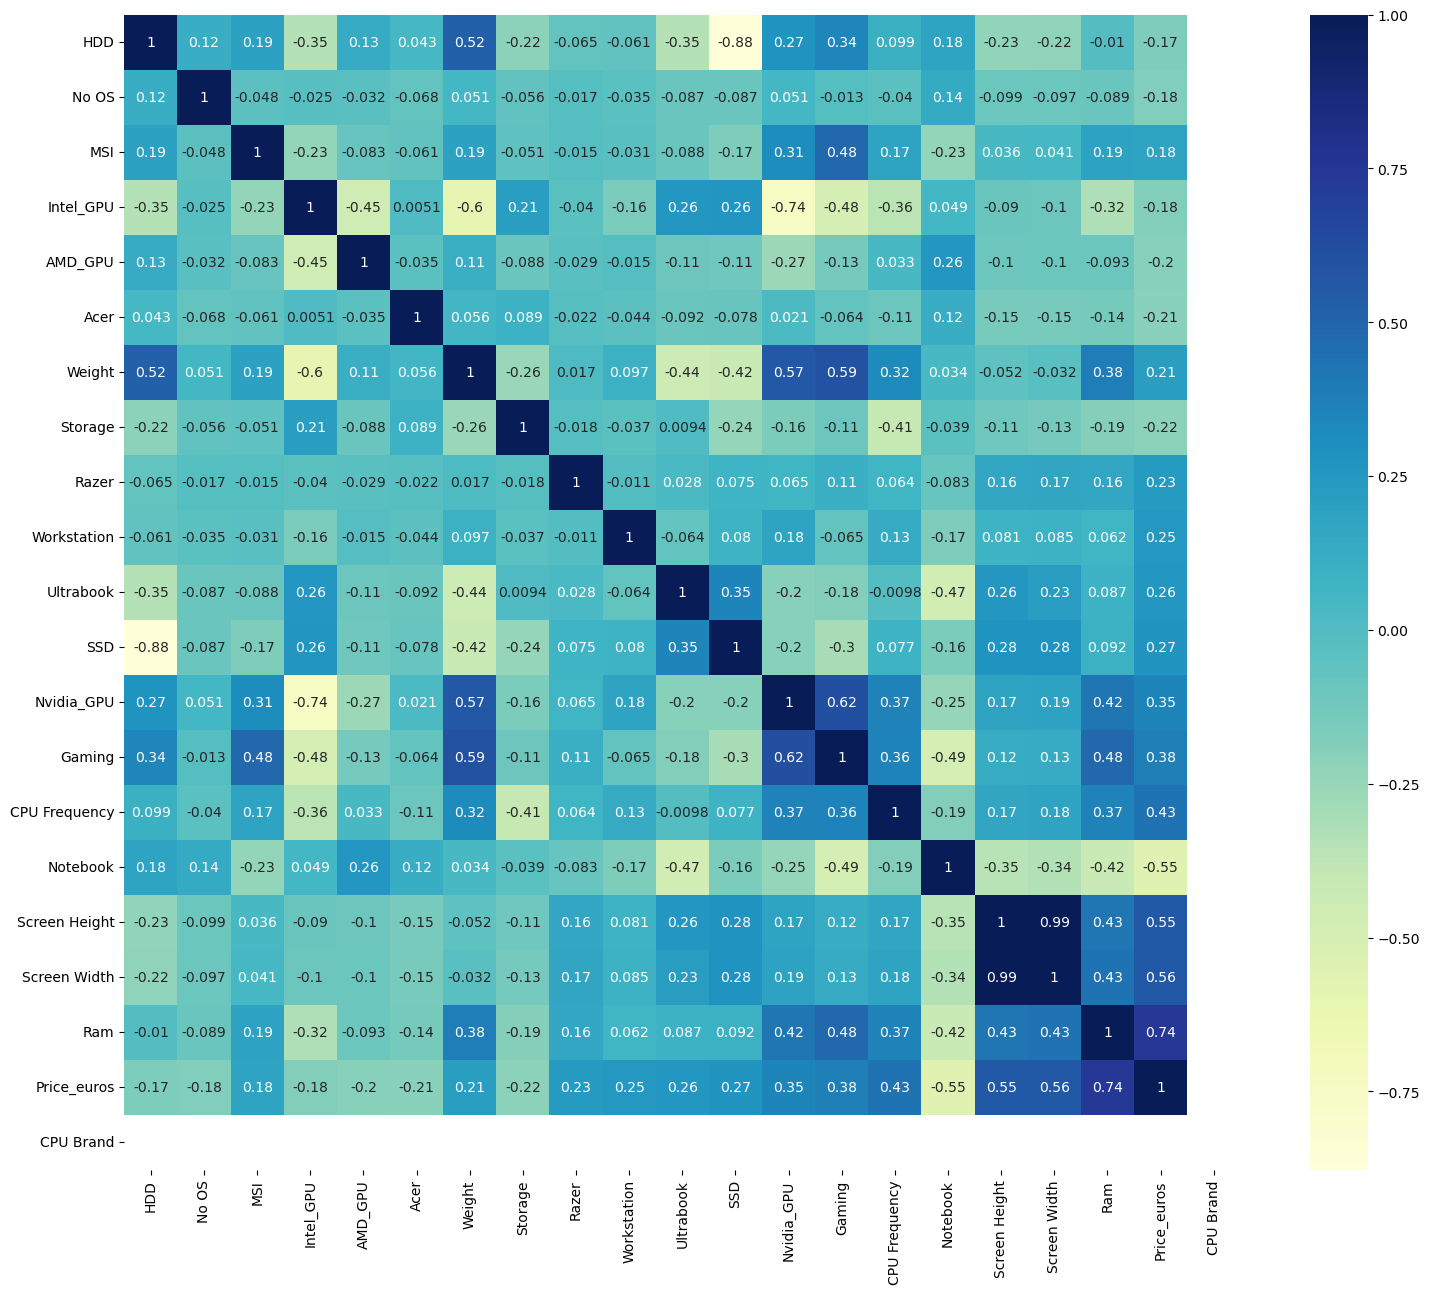

In [46]:
plt.figure(figsize=(18, 15))
sns.heatmap(limited_df.corr(), annot=True, cmap="YlGnBu")

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X, y = limited_df.drop("Price_euros", axis=1), limited_df["Price_euros"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
forest = RandomForestRegressor()

forest.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [49]:
forest.score(X_test_scaled, y_test)

0.8596190668481198

In [50]:
y_pred = forest.predict(X_test_scaled)

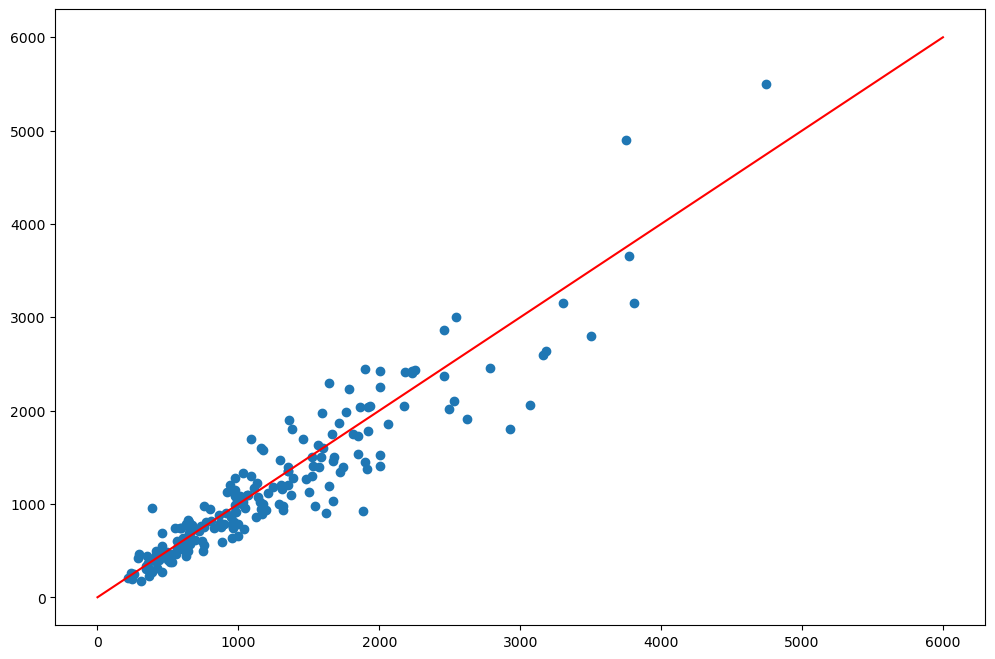

In [51]:
plt.figure(figsize=(12, 8))
plt.scatter(y_pred, y_test)
plt.plot(range(0, 6000), range(0, 6000), c="red")

In [52]:
X_test.iloc[0]

HDD                 1.0
No OS               0.0
MSI                 0.0
Intel_GPU           0.0
AMD_GPU             0.0
Acer                0.0
Weight              2.2
Storage             0.0
Razer               0.0
Workstation         0.0
Ultrabook           0.0
SSD                 0.0
Nvidia_GPU          1.0
Gaming              1.0
CPU Frequency       2.6
Notebook            0.0
Screen Height    1080.0
Screen Width     1920.0
Ram                 8.0
CPU Brand           0.0
Name: 1204, dtype: float64

In [53]:
X_new_scaled = scaler.transform([X_test.iloc[0]])

C:\Users\kubra\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [54]:
forest.predict(X_new_scaled)

array([1306.48863333])

In [55]:
y_test.iloc[0]

1169.0